In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

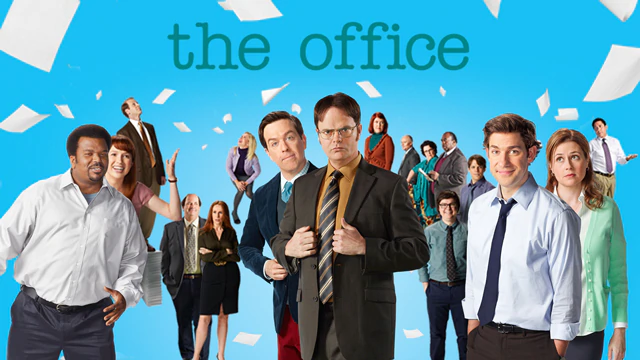

## **About The Show**

The Office is an American mockumentary sitcom television series that depicts the everyday lives of office employees in the Scranton, Pennsylvania, branch of the fictional Dunder Mifflin Paper Company. It aired on NBC from March 24, 2005, to May 16, 2013, lasting a total of nine seasons. It is an adaptation of the 2001-2003 BBC series of the same name, being adapted for American television by Greg Daniels, a veteran writer for Saturday Night Live, King of the Hill, and The Simpsons. It was co-produced by Daniels's Deedle-Dee Productions, and Reveille Productions (later Shine America), in association with Universal Television. The original executive producers were Daniels, Howard Klein, Ben Silverman, Ricky Gervais, and Stephen Merchant, with numerous others being promoted in later seasons.


Like its British counterpart, the series was filmed in a single-camera setup without a studio audience or a laugh track in order to simulate the look of an actual documentary. The series debuted on NBC as a mid-season replacement and aired 201 episodes over the course of its run. The Office originally featured Steve Carell, Rainn Wilson, John Krasinski, Jenna Fischer, and B. J. Novak as the main cast; however, the series experienced numerous changes to its ensemble cast during its run. Notable stars outside the original main cast include Ed Helms, Mindy Kaling, Craig Robinson, James Spader, Ellie Kemper, and Catherine Tate.

In [ ]:
! pip install wikipedia

In [ ]:
# Importing required libraries
import wikipedia
import numpy as np
import pandas as pd
from PIL import Image
import re
# For handling string
import string
import requests
import io
import seaborn as sns
from io import BytesIO
import random
import matplotlib.pyplot as plt 
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [ ]:
# Function for grey colour of cloud
def grey_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return "hsl(0, 0%%, %d%%)" % random.randint(60, 100)

# Function that makes the cloud
def make_cloud(x, url):
    response = requests.get(url) # Requesting the url for image
    mask = np.array(Image.open(BytesIO(response.content))) # Converting image to numpy array to make mask
    cloud = WordCloud(background_color='black',
                      width=5000, height=5000, 
                      max_words=2000, max_font_size=200, 
                      min_font_size=1, mask=mask, stopwords=STOPWORDS)
    cloud.generate(x) # Generating WordCloud
    
    fig, ax = plt.subplots(figsize=(15, 15))
    ax.imshow(cloud.recolor(color_func=grey_color_func, random_state=3), interpolation='bilinear') # Adding grey colour
    ax.set_axis_off()
    
    plt.show(cloud)

In [ ]:
# Looking up wikipedia pages for the TV show
wikipedia.search('The Office (US)')

In [ ]:
# Collecting the content to create a word cloud
the_office = wikipedia.page('The Office (American TV Series)')
df_content = the_office.content
the_office.content

In [ ]:
# Creating a word cloud
make_cloud(df_content, 'https://www.givememyremote.com/remote/wp-content/uploads/2011/08/the-office-featured.jpg')

In [ ]:
# Loading the data set
data_path = '/kaggle/input/the-office-us-complete-dialoguetranscript'
office = pd.read_csv('/kaggle/input/the-office-us-complete-dialoguetranscript/The-Office-Lines-V2.csv')
PLOT_BGCOLOR='#DADEE3'
PAPER_BGCOLOR='rgb(255,255,255)'

pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)

## Exploratory Data Analysis 

In [ ]:
# Visualizing the top few rows of the data set
office.head(10)

We can see that the data set has 6 attributes, namely: the season of the show, episode number for each dialogue, scene number for every episode, the speaker or the character in the show and the line or dialogue the person speaks

In [ ]:
# Let us take a look at the shape of the data set
office.shape

In [ ]:
# Let us check whether there are any missing values in the data set
office.isnull().sum()

We can see that there are no missing values in the dataset

In [ ]:
# Let us take a look at the different characters in the show
office['speaker'].unique()

In [ ]:
# Let us take a look at few of the dialogues spoken by each character
line = office.groupby(['season']) 
line.first()

## Most frequently used words in the series

In [ ]:
# Let us take a look at the most frequently used word in the series
word_cloud = WordCloud(width = 1000,
                       height = 800,
                       colormap = 'Blues', 
                       margin = 0,
                       max_words = 200,  
                       min_word_length = 4,
                       max_font_size = 120, min_font_size = 15,  
                       background_color = "white").generate(" ".join(office['line']))

plt.figure(figsize = (10, 15))
plt.imshow(word_cloud, interpolation = "gaussian")
plt.axis("off")
plt.show()

## Removing contractions from the dialogues

In [ ]:
# Since there are many contractions in the dialogues like 'you're', 'aren't'and so on
# we need to expand the contractions to better understand and analyse the data
# Dictionary of English Contractions
contractions_dict = { "ain't": "are not","'s":" is","aren't": "are not",
                     "can't": "cannot","can't've": "cannot have",
                     "'cause": "because","could've": "could have","couldn't": "could not",
                     "couldn't've": "could not have", "didn't": "did not","doesn't": "does not",
                     "don't": "do not","hadn't": "had not","hadn't've": "had not have",
                     "hasn't": "has not","haven't": "have not","he'd": "he would",
                     "he'd've": "he would have","he'll": "he will", "he'll've": "he will have",
                     "how'd": "how did","how'd'y": "how do you","how'll": "how will",
                     "I'd": "I would", "I'd've": "I would have","I'll": "I will",
                     "I'll've": "I will have","I'm": "I am","I've": "I have", "isn't": "is not",
                     "it'd": "it would","it'd've": "it would have","it'll": "it will",
                     "it'll've": "it will have", "let's": "let us","ma'am": "madam",
                     "mayn't": "may not","might've": "might have","mightn't": "might not", 
                     "mightn't've": "might not have","must've": "must have","mustn't": "must not",
                     "mustn't've": "must not have", "needn't": "need not",
                     "needn't've": "need not have","o'clock": "of the clock","oughtn't": "ought not",
                     "oughtn't've": "ought not have","shan't": "shall not","sha'n't": "shall not",
                     "shan't've": "shall not have","she'd": "she would","she'd've": "she would have",
                     "she'll": "she will", "she'll've": "she will have","should've": "should have",
                     "shouldn't": "should not", "shouldn't've": "should not have","so've": "so have",
                     "that'd": "that would","that'd've": "that would have", "there'd": "there would",
                     "there'd've": "there would have", "they'd": "they would",
                     "they'd've": "they would have","they'll": "they will",
                     "they'll've": "they will have", "they're": "they are","they've": "they have",
                     "to've": "to have","wasn't": "was not","we'd": "we would",
                     "we'd've": "we would have","we'll": "we will","we'll've": "we will have",
                     "we're": "we are","we've": "we have", "weren't": "were not","what'll": "what will",
                     "what'll've": "what will have","what're": "what are", "what've": "what have",
                     "when've": "when have","where'd": "where did", "where've": "where have",
                     "who'll": "who will","who'll've": "who will have","who've": "who have",
                     "why've": "why have","will've": "will have","won't": "will not",
                     "won't've": "will not have", "would've": "would have","wouldn't": "would not",
                     "wouldn't've": "would not have","y'all": "you all", "y'all'd": "you all would",
                     "y'all'd've": "you all would have","y'all're": "you all are",
                     "y'all've": "you all have", "you'd": "you would","you'd've": "you would have",
                     "you'll": "you will","you'll've": "you will have", "you're": "you are",
                     "you've": "you have"}

# Regular expression for finding contractions
contractions_re = re.compile('(%s)' % '|'.join(contractions_dict.keys()))

# Function for expanding contractions
def expand_contractions(text,contractions_dict=contractions_dict):
  def replace(match):
    return contractions_dict[match.group(0)]
  return contractions_re.sub(replace, text)

# Expanding Contractions in the reviews
office['line'] = office['line'].apply(lambda x:expand_contractions(x))

In [ ]:
# Let us take a look at the dialogues now, to verify whether the contractions have been expanded or not
office['line'].sample(10)

In [ ]:
# Let us take a look at number of words in each dialogue
office.line.str.split().\
    map(lambda x: len(x)).\
    hist()

Here we can see that the number of words in most of the dialogues range from 0 to 50. While  ost of the dialogues have the range of 0 to 25

## Visualizing the most frequently used bigrams

In [ ]:
# Defining a function to visualise n-grams
def get_top_ngram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) 
                  for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:10]

In [ ]:
# Visualising the most frequent bigrams occurring in the conversation
from sklearn.feature_extraction.text import CountVectorizer
top_bigrams = get_top_ngram(office['line'],2)[:10]
x,y = map(list,zip(*top_bigrams))
sns.barplot(x = y,y = x)

## Visualizing the most frequently used trigrams

In [ ]:
# Visualising the most frequent trigrams occurring in the conversation
from sklearn.feature_extraction.text import CountVectorizer
top_trigrams = get_top_ngram(office['line'],3)[:10]
x,y = map(list,zip(*top_trigrams))
sns.barplot(x = y,y = x)

## Lead Characters in the Series 

The lead characters in the series are:<br>
1. Michael
2. Dwight
3. Jim 
4. Pam
5. Ryan
6. Andy
7. Stanley
8. Kevin
9. Angela 
10. Oscar
11. Phyllis
12. Jan, and 
13. Kelly

In [ ]:
# Let us take a look at the dialogues said by Michael
office_filtered_m = office[office['speaker'] == 'Michael'] 
  
# Print the new dataframe 
print(office_filtered_m.head(15))

# Print the shape of the dataframe 
print(office_filtered_m.shape) 

Here we can see the lines spoken by Michael, and he has spoken a total of 10712 lines in the entire series

## Most used words by Michael 

In [ ]:
# Visualizing the most used words in the series by Michael
word_cloud = WordCloud(width = 1000,
                       height = 800,
                       colormap = 'GnBu', 
                       margin = 0,
                       max_words = 200,  
                       min_word_length = 4,
                       max_font_size = 120, min_font_size = 15,  
                       background_color = "white").generate(" ".join(office_filtered_m['line']))

plt.figure(figsize = (10, 15))
plt.imshow(word_cloud, interpolation = "gaussian")
plt.axis("off")
plt.show()

## Most used words by Dwight

In [ ]:
# Let us take a look at the dialogues said by Dwight
office_filtered_d = office[office['speaker'] == 'Dwight'] 
  
# Visualizing the most used words in the series by Dwight
word_cloud = WordCloud(width = 1000,
                       height = 800,
                       colormap = 'twilight_shifted', 
                       margin = 0,
                       max_words = 200,  
                       min_word_length = 4,
                       max_font_size = 120, min_font_size = 15,  
                       background_color = "white").generate(" ".join(office_filtered_d['line']))

plt.figure(figsize = (10, 15))
plt.imshow(word_cloud, interpolation = "gaussian")
plt.axis("off")
plt.show()

## Most used words by Jim

In [ ]:
# Let us take a look at the dialogues said by Jim
office_jim = office[office['speaker'] == 'Jim'] 
  
# Visualizing the most used words in the series by Dwight
word_cloud = WordCloud(width = 1000,
                       height = 800,
                       colormap = 'twilight_shifted_r', 
                       margin = 0,
                       max_words = 200,  
                       min_word_length = 4,
                       max_font_size = 120, min_font_size = 15,  
                       background_color = "white").generate(" ".join(office_jim['line']))

plt.figure(figsize = (10, 15))
plt.imshow(word_cloud, interpolation = "gaussian")
plt.axis("off")
plt.show()

## Most used words by Pam

In [ ]:
# Let us take a look at the dialogues said by Pam
office_pam = office[office['speaker'] == 'Pam'] 
  
# Visualizing the most used words in the series by Dwight
word_cloud = WordCloud(width = 1000,
                       height = 800,
                       colormap = 'inferno', 
                       margin = 0,
                       max_words = 200,  
                       min_word_length = 4,
                       max_font_size = 120, min_font_size = 15,  
                       background_color = "white").generate(" ".join(office_pam['line']))

plt.figure(figsize = (10, 15))
plt.imshow(word_cloud, interpolation = "gaussian")
plt.axis("off")
plt.show()

We can see here that Pam calls Michael and Dwight more than Jim, even though Jim and Pam were dating and later got married in the show. One reason for this can be that, Pam worked as a receptionist at Dunder Mifflin, and mostly handled calls for Michael who was the Regional Manager, while Dwight was the 'Assistant to the Regional Manager'. Also, we can see that she has used words like 'Love', 'Baby' to address Jim.

# Sentiment Analysis using TextBlob

### Sentiment score distribution of the dialogues

In [ ]:
# TextBlob library provides a consistent API for NLP tasks such as POS Tagging, noun-phrase extraction and sentiment analysis
from textblob import TextBlob

# Defining a function to check the sentiment polarity (whether it is positive or negative or neutral)
def polarity(text):
    return TextBlob(text).sentiment.polarity

office['polarity_score'] = office['line'].\
   apply(lambda x : polarity(x))
office['polarity_score'].hist()

## Distribution of positive, negative and neutral sentiments

In [ ]:
# Defining a function to classify the sentiment based on the polarity 
def sentiment(x):
    if x<0:
        return 'neg'
    elif x==0:
        return 'neu'
    else:
        return 'pos'
    
office['polarity'] = office['polarity_score'].\
   map(lambda x: sentiment(x))

plt.bar(office.polarity.value_counts().index,
        office.polarity.value_counts())

## Dialogues having positive sentiment 

In [ ]:
# Printing dialogues having a positive sentiment
office[office['polarity'] == 'pos']['line'].head()

## Dialogues having negative sentiment

In [ ]:
# Printing dialogues having a negative sentiment
office[office['polarity'] == 'neg']['line'].head()

## Dialogues having neutral sentiment

In [ ]:
# Printing dialogues having a neutral sentiment
office[office['polarity'] == 'neu']['line'].head()